# Libraries

In [1]:
# Data transformation
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt

# Data

In [2]:
x_train = np.array([[10, 50], [20, 30], [25, 30], [20, 60], [15, 70], [40, 40], [30, 45], [20, 45], [40, 30], [7, 35]])
x_train = np.column_stack((x_train, np.ones(x_train.shape[0]))).astype(int) # add additional column for w0 parameter
y_train = np.array([-1, 1, 1, -1, -1, 1, 1, -1, 1, -1])

# Implementation

In [3]:
def loss(w, x, y):
    M = (w @ x) * y
    return 2 / (1 + np.exp(M))

In [4]:
def der_loss(w, x, y):
    M = (w @ x) * y
    return -2 * (1 + np.exp(M)) ** (-2) * np.exp(M) * x * y

In [5]:
df_len = len(x_train)
w = [0.0, 0.0, 0.0]
N = 500
nu = 0.0005
lmbd = 2 / (N + 1)
Q = np.mean([loss(w, x, y) for x, y in zip(x_train, y_train)])
Q_plot = [Q]

In [6]:
for i in range(N):
    k = np.random.randint(0, df_len - 1)
    ek = loss(w, x_train[k], y_train[k])
    w = w - nu * der_loss(w, x_train[k], y_train[k])
    Q = lmbd * ek + (1 - lmbd) * Q
    Q_plot.append(Q)

In [7]:
w

array([ 0.31934183, -0.16898588,  0.00529659])

# Visualization

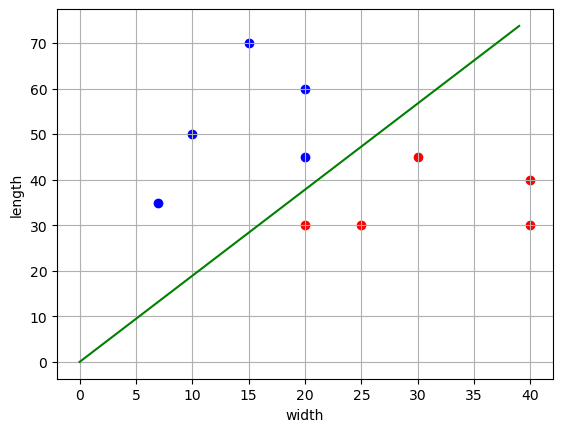

In [8]:
line_x = list(range(max(x_train[:, 0])))
line_y = [-x * w[0] / w[1] - w[2] / w[1] for x in line_x]

x_0 = x_train[y_train == 1]
x_1 = x_train[y_train == -1]

plt.scatter(x_0[:, 0], x_0[:, 1], color='red')
plt.scatter(x_1[:, 0], x_1[:, 1], color='blue')
plt.plot(line_x, line_y, color='green')

plt.ylabel('length')
plt.xlabel('width')
plt.grid(True)
plt.show()

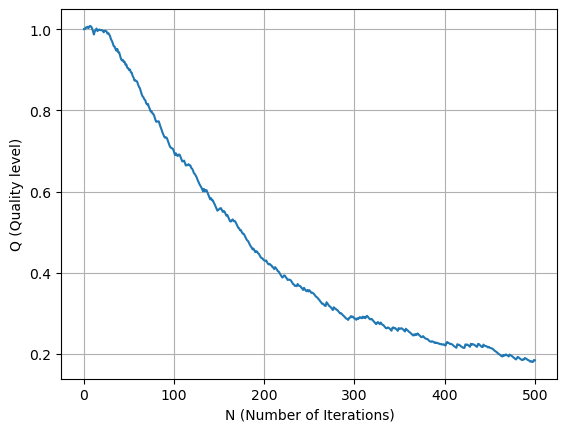

In [9]:
plt.plot(range(N + 1), Q_plot)

plt.xlabel('N (Number of Iterations)')
plt.ylabel('Q (Quality level)')
plt.grid(True)
plt.show()